In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

In [2]:
data = np.array([[3,4],[2,8],[6,9],[10,12]])

In [3]:
data = pd.DataFrame(data,columns= ["col1","col2"])
data

,col1,col2
0,3,4
1,2,8
2,6,9
3,10,12


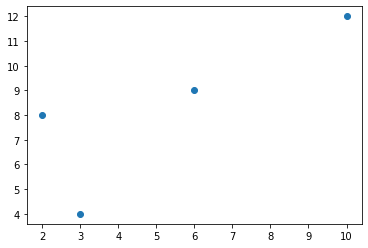

In [4]:
plt.scatter(data["col1"],data["col2"])

# Steps for PCA 
1. Standardization of the data
2. Covariance Matrix
3. Eig Value and Eig Vector
4. Find Principal Component

### 1.1  Standardization of data without using Standard Scaler

In [5]:
# get Average value of each column
mean_by_col= np.mean(data,axis=0)
mean_by_col

col1    5.25
col2    8.25
dtype: float64

In [6]:
# get standard deviation of each column
std_by_col= np.std(data,axis=0)
std_by_col

col1    3.112475
col2    2.861381
dtype: float64

In [7]:
# From each point of the dateset substract mean of each column and then divide by standard deviation
scaled_data = (data - mean_by_col)/std_by_col
scaled_data

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


### 1.2. Standardization of data using Standard Scaler

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
scaler_data = scaler.fit_transform(data)
scaler_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [10]:
scaled_data1= pd.DataFrame(scaler_data, columns =["col1","col2"])
scaled_data1

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


### Step 2: Covariance Matrix

In [22]:
cov_matrix=  np.cov(scaled_data.T)
cov_matrix

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

### Step 3: Eigen Value and Eigen Vector

In [23]:
eig_val, eig_vec = np.linalg.eig(cov_matrix)

In [24]:
eig_val

array([2.40938985, 0.25727682])

In [25]:
eig_vec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [27]:
eig_vec.T.dot(scaled_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

### Performing Step2 and Step3 using  Sci-Kit Learn library

In [28]:
from sklearn.decomposition import PCA
pca= PCA()

In [30]:
pc= pca.fit_transform(scaled_data1)
pc

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [32]:
pd.DataFrame(pc, columns=["pc1","pc2"])

,pc1,pc2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [34]:
# If we do inverse transform we will get scaled data after Step1

pc_inverse= pca.inverse_transform(pc)
pc_inverse

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [35]:
# explained variance ratio
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

#### Note: First Principal component is representing 90% of the data while second is representing 10% of the data 

## Performing PCA on glass Dataset 

In [81]:
data_glass= pd.read_csv("D:\Study\Data Science\Dataset\glassm-data.csv")
data_glass

,Id,RI,Na,Mg,Al,Si,Ka,Ca,Ba,Fe,Type
0,1,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.0,1
1,2,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.0,1
2,3,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.0,1
3,4,1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0.00,0.0,1
4,5,1.51911,13.90,3.73,1.18,72.12,0.06,8.89,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
180,195,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
181,196,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
182,198,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
183,199,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [82]:
# drop ID column as it does not make sense
# drop Type as PCA is only performed on independent column
data_glass.drop(["Id","Type"], axis=1, inplace = True)

In [83]:
data_glass

,RI,Na,Mg,Al,Si,Ka,Ca,Ba,Fe
0,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.0
1,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.0
2,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.0
3,1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0.00,0.0
4,1.51911,13.90,3.73,1.18,72.12,0.06,8.89,0.00,0.0
...,...,...,...,...,...,...,...,...,...
180,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0
181,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
182,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
183,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [84]:
#Step 1: Scaling of the dataset

from sklearn.preprocessing import StandardScaler
scaler_glass = StandardScaler()

In [85]:
scaler_data = scaler_glass.fit_transform(data_glass)
scaler_data

array([[-0.25394066, -0.97997081,  0.67135289, ..., -0.35057427,
        -0.36847955, -0.57821446],
       [-0.26026142, -0.74417111,  0.63760832, ..., -0.42438129,
        -0.36847955, -0.57821446],
       [-0.18757272, -0.89744091,  0.72534421, ..., -0.21637969,
        -0.36847955, -0.57821446],
       ...,
       [ 0.70049356,  1.08327657, -1.75150764, ..., -0.39083264,
         2.79140441, -0.57821446],
       [-0.60790302,  1.10685654, -1.75150764, ..., -0.36399373,
         2.65653132, -0.57821446],
       [-0.41828033,  0.93000676, -1.75150764, ..., -0.27005752,
         2.84920717, -0.57821446]])

In [91]:
# showing scaled data of glass

scaled_data_glass = pd.DataFrame(scaler_data, columns =data_glass.columns )
scaled_data_glass

,RI,Na,Mg,Al,Si,Ka,Ca,Ba,Fe
0,-0.253941,-0.979971,0.671353,-0.277352,0.821435,0.124273,-0.350574,-0.368480,-0.578214
1,-0.260261,-0.744171,0.637608,-0.430631,0.759645,0.124273,-0.424381,-0.368480,-0.578214
2,-0.187573,-0.897441,0.725344,-0.564749,0.598992,0.167407,-0.216380,-0.368480,-0.578214
3,1.114503,1.083277,0.846825,-1.082065,-1.563645,-0.493983,0.085558,-0.368480,-0.578214
4,0.213795,0.540937,0.765838,-0.526430,-0.624443,-0.623385,-0.088895,-0.368480,-0.578214
...,...,...,...,...,...,...,...,...,...
180,-0.642667,1.095067,-1.751508,2.462507,0.277686,-0.709653,0.286850,0.671970,-0.578214
181,-0.696394,0.823897,-1.751508,2.730745,-0.018904,-0.594629,0.105687,1.673884,-0.578214
182,0.700494,1.083277,-1.751508,1.082998,0.982088,-0.709653,-0.390833,2.791404,-0.578214
183,-0.607903,1.106857,-1.751508,0.929719,1.216888,-0.709653,-0.363994,2.656531,-0.578214


In [92]:
#Step 2: PCA of the dataset

from sklearn.decomposition import PCA
pca= PCA()
pc_df= pca.fit_transform(scaled_data_glass)
pc_df

array([[-0.05921841, -1.18701074, -0.24152989, ...,  0.03590552,
        -0.16421117, -0.0231837 ],
       [-0.08724836, -1.17499077, -0.33774635, ...,  0.17626492,
        -0.15144278,  0.01286904],
       [ 0.18977839, -1.18525971, -0.21029641, ...,  0.20505643,
        -0.01712918, -0.04545293],
       ...,
       [-1.70876411,  3.00842509, -0.89491087, ...,  0.68251043,
        -0.84506999,  0.03943289],
       [-2.3507088 ,  2.47813472, -1.2120431 , ...,  0.67648003,
         0.07881144, -0.02663198],
       [-2.25376959,  2.74470934, -0.87415286, ...,  0.47506014,
         0.06869029, -0.01842894]])

In [93]:
pd.DataFrame(pc_df)

,0,1,2,3,4,5,6,7,8
0,-0.059218,-1.187011,-0.241530,0.740070,-0.473438,0.751133,0.035906,-0.164211,-0.023184
1,-0.087248,-1.174991,-0.337746,0.540213,-0.477835,0.616127,0.176265,-0.151443,0.012869
2,0.189778,-1.185260,-0.210296,0.537624,-0.553946,0.681184,0.205056,-0.017129,-0.045453
3,1.339123,-0.003426,-0.246790,-2.166832,-0.904555,-0.280366,0.104325,-0.104722,0.044873
4,0.493163,-0.387949,-0.545822,-1.155935,-0.590748,0.030288,-0.270799,0.085430,-0.012411
...,...,...,...,...,...,...,...,...,...
180,-2.005495,2.348145,-0.471258,0.482037,0.026228,-0.508122,-1.393981,0.006832,-0.020897
181,-2.379092,2.781045,0.035379,0.285853,0.254992,0.239301,-1.247276,0.184508,-0.023810
182,-1.708764,3.008425,-0.894911,-0.074470,0.589883,1.159991,0.682510,-0.845070,0.039433
183,-2.350709,2.478135,-1.212043,0.225879,0.717069,0.932445,0.676480,0.078811,-0.026632


In [95]:
# explained variance ratio
pca_variance= pca.explained_variance_ratio_
pca_variance

array([2.84168597e-01, 2.21784556e-01, 1.57610377e-01, 1.26049115e-01,
       1.02716891e-01, 5.97184976e-02, 4.13313588e-02, 6.49608910e-03,
       1.24518082e-04])

In [98]:
# Maximum value of the variance
max(pca_variance)

0.2841685965460476

In [99]:
# Minimum value of the variance
min(pca_variance)

0.00012451808198488

In [100]:
# Sum value of the variance
sum(pca_variance)

1.0

In [104]:
sorted(pca_variance,reverse= True)

[0.2841685965460476,
 0.22178455619923956,
 0.1576103771158251,
 0.12604911523409376,
 0.10271689131889569,
 0.05971849755767253,
 0.041331358843932554,
 0.006496089102308376,
 0.00012451808198488]

In [107]:
# if we take 6 values from the Principal components we get 95% of data
sum(sorted(pca_variance,reverse= True)[:6]) *100

95.20480339717743

In [109]:
# if we take 5 values from the Principal components we get 89% of data
sum(sorted(pca_variance,reverse= True)[:5]) *100

89.23295364141018

In [110]:
# if we take 7 values from the Principal components we get 89% of data
sum(sorted(pca_variance,reverse= True)[:7]) *100

99.33793928157068

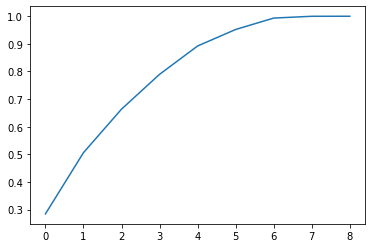

In [111]:
# Above hypothesis is also verified by the

plt.plot(np.cumsum(pca_variance))
plt.show()

In [112]:
# After zero down on the number of components we can create pca with the number of components
from sklearn.decomposition import PCA
pca_6= PCA(n_components=6)
pc_df= pca_6.fit_transform(scaled_data_glass)
pc_df

array([[-0.05921841, -1.18701074, -0.24152989,  0.74006973, -0.47343791,
         0.75113315],
       [-0.08724836, -1.17499077, -0.33774635,  0.54021308, -0.47783452,
         0.61612723],
       [ 0.18977839, -1.18525971, -0.21029641,  0.5376238 , -0.55394621,
         0.68118396],
       ...,
       [-1.70876411,  3.00842509, -0.89491087, -0.07446978,  0.58988265,
         1.15999092],
       [-2.3507088 ,  2.47813472, -1.2120431 ,  0.22587863,  0.71706936,
         0.93244467],
       [-2.25376959,  2.74470934, -0.87415286,  0.1511437 ,  0.69792235,
         1.13058724]])

In [113]:
pd.DataFrame(pc_df)

,0,1,2,3,4,5
0,-0.059218,-1.187011,-0.241530,0.740070,-0.473438,0.751133
1,-0.087248,-1.174991,-0.337746,0.540213,-0.477835,0.616127
2,0.189778,-1.185260,-0.210296,0.537624,-0.553946,0.681184
3,1.339123,-0.003426,-0.246790,-2.166832,-0.904555,-0.280366
4,0.493163,-0.387949,-0.545822,-1.155935,-0.590748,0.030288
...,...,...,...,...,...,...
180,-2.005495,2.348145,-0.471258,0.482037,0.026228,-0.508122
181,-2.379092,2.781045,0.035379,0.285853,0.254992,0.239301
182,-1.708764,3.008425,-0.894911,-0.074470,0.589883,1.159991
183,-2.350709,2.478135,-1.212043,0.225879,0.717069,0.932445
